In [7]:
from QuditsOnQubits import create_ame43
from qiskit import qpy
from qiskit.circuit import QuantumCircuit

In [3]:
ame43 = create_ame43()

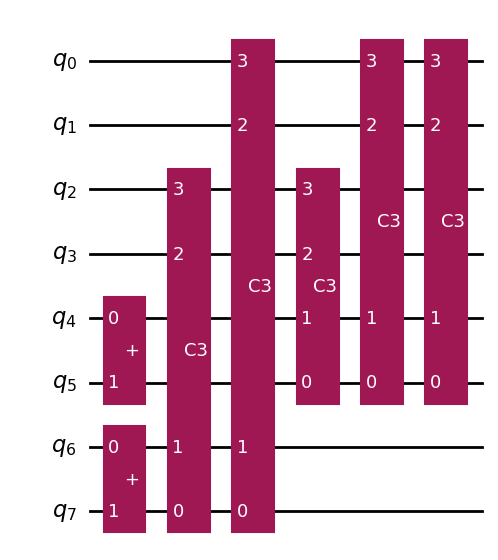

In [4]:
ame43.draw('mpl')

In [6]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

In [25]:
operators = []

In [26]:
G1 = QuantumCircuit(8)
G1.append(Xgate, [0, 1])
G1.append(Zgate, [2, 3])
G1.append(Zgate, [6, 7])
operators.append(G1)

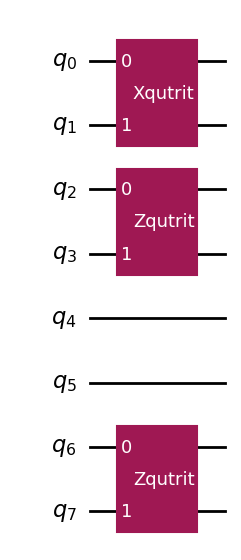

In [27]:
G1.draw('mpl')

In [28]:
G1G2 = QuantumCircuit(8)
G1G2.append(Xgate, [0, 1])
G1G2.append(Zgate, [0, 1])
G1G2.append(Zgate, [2, 3])
G1G2.append(Xgate, [2, 3])
G1G2.append(Zgate, [4, 5])
G1G2.append(Zgate, [6, 7])
operators.append(G1G2)

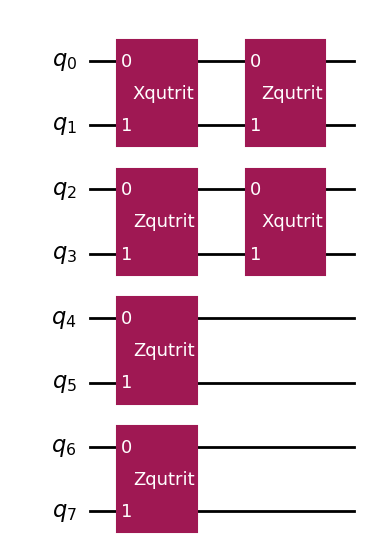

In [14]:
G1G2.draw('mpl')

In [29]:
G1G22 = QuantumCircuit(8)
G1G22.append(Xgate, [0, 1])
G1G22.append(Zgate, [0, 1])
G1G22.append(Zgate, [0, 1])
G1G22.append(Zgate, [2, 3])
G1G22.append(Xgate, [2, 3])
G1G22.append(Xgate, [2, 3])
G1G22.append(Zgate, [4, 5])
G1G22.append(Zgate, [4, 5])
G1G22.append(Zgate, [6, 7])
operators.append(G1G22)

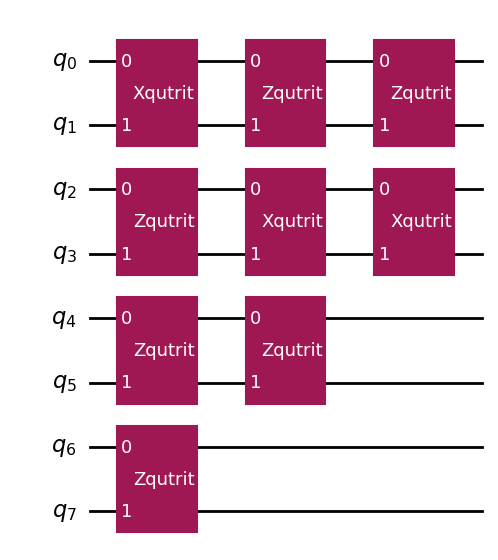

In [16]:
G1G22.draw('mpl')

In [30]:
G3 = QuantumCircuit(8)
G3.append(Zgate, [2, 3])
G3.append(Xgate, [4, 5])
G3.append(Zgate, [6, 7])
G3.append(Zgate, [6, 7])
operators.append(G3)

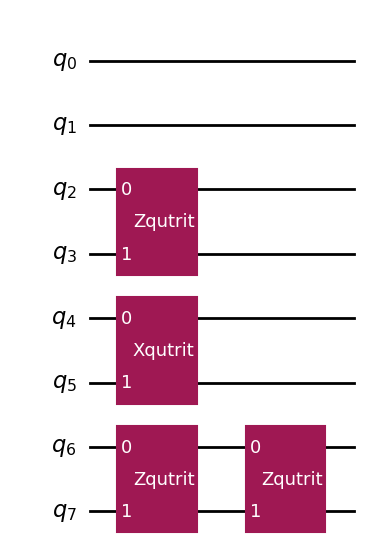

In [21]:
G3.draw('mpl')

In [31]:
G1G4 = QuantumCircuit(8)
G1G4.append(Xgate, [0, 1])
G1G4.append(Zgate, [0, 1])
G1G4.append(Zgate, [2, 3])
G1G4.append(Zgate, [4, 5])
G1G4.append(Zgate, [4, 5])
G1G4.append(Zgate, [6, 7])
G1G4.append(Xgate, [6, 7])
operators.append(G1G4)

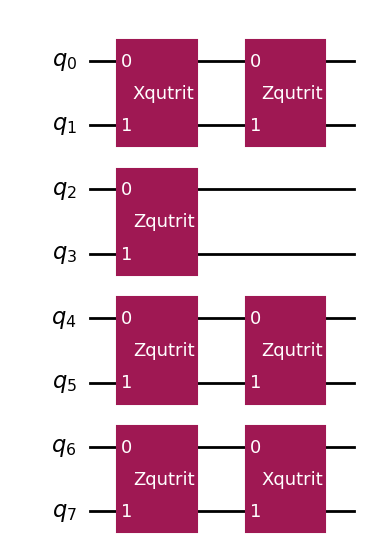

In [23]:
G1G4.draw('mpl')

In [41]:
final_circs = []

for i in operators:
    tempcirc = ame43.copy()
    tempcirc.append(i, [0, 1, 2, 3, 4, 5, 6, 7])
    tempcirc.measure_all()
    final_circs.append(tempcirc)

In [42]:
import numpy as np

def exp_bell(counts, shots, k):
    oper = 0
    keys = list(counts.keys())[k]
    for i in list(counts.keys()):
        p = counts[i]/shots
        sum = 0
        for j in range(0, len(i), 2):
            if f'{keys[j]}{keys[j+1]}' == "00":
                sum += 0
            elif f'{keys[j]}{keys[j+1]}' == "01":
                sum += 1
            elif f'{keys[j]}{keys[j+1]}' == "10":
                sum += 2
        omega = np.exp(2*np.pi*1.j/3)
        f = pow(omega, sum)
        oper += p*f

    return oper

In [56]:
from qiskit.primitives import StatevectorSampler

bell_exp_list = []
exps_operators = []

shots = 10000
sampler = StatevectorSampler()

for i, j in zip(final_circs, range(len(final_circs))):
    job = sampler.run([i], shots = shots)
    data_pub = job.result()[0].data
    counts = data_pub.meas.get_counts()
    #exps_operators.append(str_list_gates[j])
    bell_exp = exp_bell(counts, shots, j)
    bell_exp_list.append(np.absolute(bell_exp))

In [57]:
bell_exp_list

[np.float64(1.0),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(1.0),
 np.float64(1.0)]

In [58]:
2 * (bell_exp_list[0] + bell_exp_list[1] + 0.5 * (bell_exp_list[2] + bell_exp_list[3]) + bell_exp_list[4])

np.float64(8.0)

In [65]:
from qiskit.circuit import Parameter
testAme43 = ame43.copy()
theta = Parameter('theta')
testAme43.ry(theta, 0)
testAme43.ry(theta, 2)
testAme43.ry(theta, 4)
testAme43.ry(theta, 6)

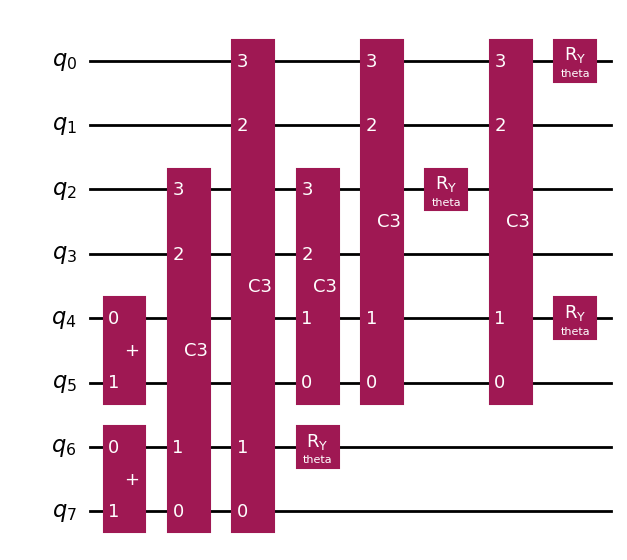

In [66]:
testAme43.draw('mpl')

In [83]:
obs_circs = [G1, G1G2, G1G22, G3, G1G4]

In [89]:
circsTheta = []

for i in obs_circs:
    tempAme43 = testAme43.copy()
    tempAme43.append(i, [0, 1, 2, 3, 4, 5, 6, 7])
    tempAme43.measure_all()
    circsTheta.append(tempAme43)

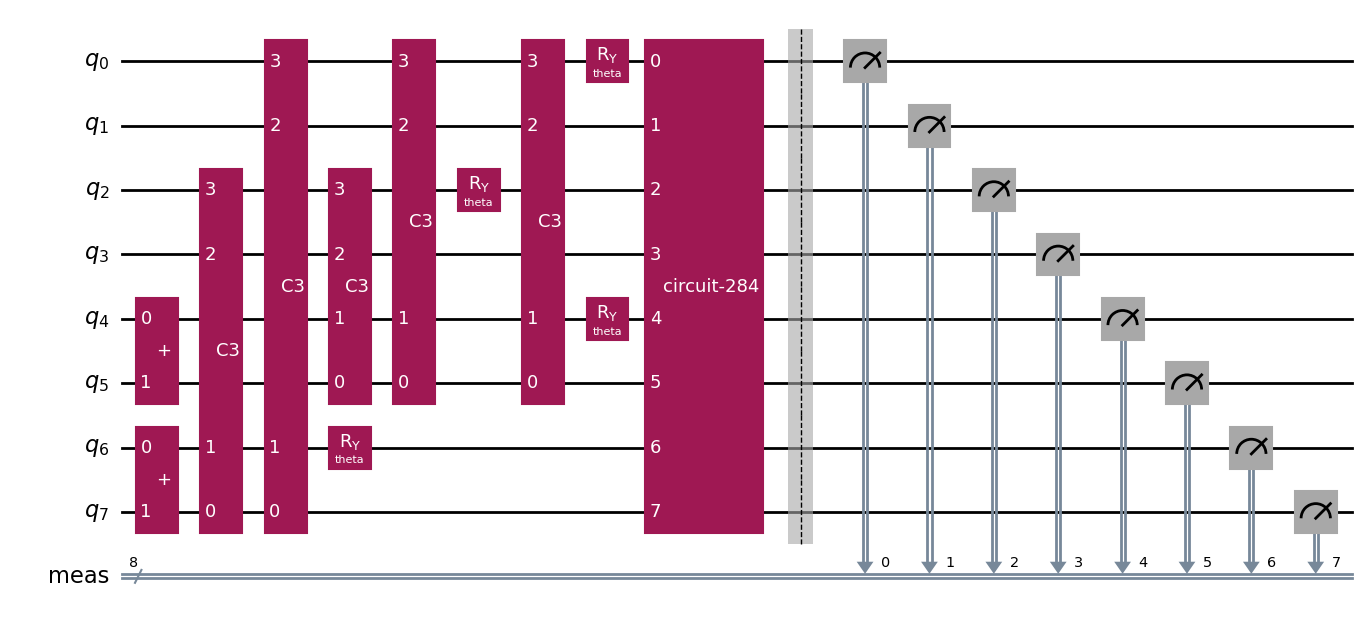

In [90]:
circsTheta[0].draw('mpl')

In [132]:
number_of_phases = 100
phases = np.linspace(0, 2 * np.pi, number_of_phases)

individual_phases = [[ph] for ph in phases]

In [133]:
from qiskit.primitives import StatevectorSampler

In [142]:
sampler = StatevectorSampler()

pub = (circsTheta[0], individual_phases)
job = sampler.run([pub], shots=10000)
result = job.result()[0]
counts = result.data.meas.get_counts()
exp_bell(counts, 10000, 0)

np.complex128(-49.999999999999936+86.60254037844388j)

In [135]:
result.data.meas

BitArray(<shape=(100,), num_shots=10000, num_bits=8>)

In [140]:
expectations = [
    exp_bell(counts,         # słownik/counts z całego BitArray
             10000,              # liczba strzałów
             idx)                # który "pod-obwód" (θ) chcesz policzyć
    for idx in range(len(individual_phases))
]

In [141]:
expectations

[np.complex128(100-6.106226635438361e-14j),
 np.complex128(100-1.2212453270876722e-13j),
 np.complex128(-49.99999999999999+86.60254037844388j),
 np.complex128(-49.99999999999993+86.60254037844388j),
 np.complex128(-49.99999999999993+86.60254037844388j),
 np.complex128(-50.0000000000001-86.60254037844379j),
 np.complex128(100-1.2212453270876722e-13j),
 np.complex128(-50.00000000000006-86.60254037844382j),
 np.complex128(-50.0000000000001-86.60254037844379j),
 np.complex128(-49.99999999999993+86.60254037844388j),
 np.complex128(-49.99999999999999+86.60254037844388j),
 np.complex128(100-6.106226635438361e-14j),
 np.complex128(-49.99999999999993+86.60254037844388j),
 np.complex128(-50.00000000000006-86.60254037844382j),
 np.complex128(100-6.106226635438361e-14j),
 np.complex128(-49.99999999999999+86.60254037844388j),
 np.complex128(-49.999999999999865+86.60254037844389j),
 np.complex128(-49.99999999999993+86.60254037844388j),
 np.complex128(100-6.106226635438361e-14j),
 np.complex128(-49.9